<span style="font-size:24px;">Tugas Text Preprocessing</span>

<span style="font-size:16px;">Nama: Raihan Satriya Bagaskara</span>

<span style="font-size:16px;">NIM: A11.2020.12757</span>






------------------------------------------------------------------------------------------------------------------------------

<span style="font-size:24px;"><strong>Import Resource</strong></span>


In [1]:
import json
import pandas as pd
import os
import numpy as np

In [2]:
import nltk

import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Winry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Winry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Winry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

---------------------------------------------

<span style="font-size:24px;"><strong>Load Data JSON</strong></span>

In [5]:
with open('datapackage.json', 'r') as file:
    data = json.load(file)

In [6]:
df = pd.DataFrame([data])
print(df)

   Frequency    bytes                                            datahub  \
0  Quarterly  5554653  {'created': '2018-01-10T08:50:00.114612', 'fin...   

                                         description  \
0  Contain data for 59 countries at a quarterly f...   

                               hash                        id  \
0  d3197c3e44c896dc6d05c0d819a71142  core/house-prices-global   

                  name                                          resources  \
0  house-prices-global  [{'bytes': 295193, 'datahub': {'type': 'origin...   

                                             sources  \
0  [{'name': 'Bank For International Settlements ...   

                                               title  
0  Residential property price statistics from dif...  


In [7]:
df.head()

,Frequency,bytes,datahub,description,hash,id,name,resources,sources,title
0,Quarterly,5554653,"{'created': '2018-01-10T08:50:00.114612', 'fin...",Contain data for 59 countries at a quarterly f...,d3197c3e44c896dc6d05c0d819a71142,core/house-prices-global,house-prices-global,"[{'bytes': 295193, 'datahub': {'type': 'origin...",[{'name': 'Bank For International Settlements ...,Residential property price statistics from dif...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Frequency    1 non-null      object
 1   bytes        1 non-null      int64 
 2   datahub      1 non-null      object
 3   description  1 non-null      object
 4   hash         1 non-null      object
 5   id           1 non-null      object
 6   name         1 non-null      object
 7   resources    1 non-null      object
 8   sources      1 non-null      object
 9   title        1 non-null      object
dtypes: int64(1), object(9)
memory usage: 208.0+ bytes


---------------------------------

<span style="font-size:24px;"><strong>Membuat Text menjadi Lowercase</strong></span>

In [14]:
text = df['description'].values[0]
text

'Contain data for 59 countries at a quarterly frequency (real series are the nominal price series deflated by the consumer price index), both in levels and in growth rates (ie four series per country). These indicators have been selected from the detailed data set to facilitate access for users and enhance comparability. The BIS has made the selection based on the Handbook on Residential Property Prices and the experience and metadata of central banks. An analysis based on these selected indicators is also released on a quarterly basis, with a particular focus on longer-term developments in the May release.'

--------------

<span style="font-size:24px;"><strong>Menghilangkan karakter tertentu pada teks</strong></span>


In [15]:
text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
text

'Contain data for 59 countries at a quarterly frequency real series are the nominal price series deflated by the consumer price index both in levels and in growth rates ie four series per country These indicators have been selected from the detailed data set to facilitate access for users and enhance comparability The BIS has made the selection based on the Handbook on Residential Property Prices and the experience and metadata of central banks An analysis based on these selected indicators is also released on a quarterly basis with a particular focus on longerterm developments in the May release'

---------------------

<span style="font-size:24px;"><strong>Tokenization</strong></span>


In [16]:
tokens = word_tokenize(text)
print(tokens)

['Contain', 'data', 'for', '59', 'countries', 'at', 'a', 'quarterly', 'frequency', 'real', 'series', 'are', 'the', 'nominal', 'price', 'series', 'deflated', 'by', 'the', 'consumer', 'price', 'index', 'both', 'in', 'levels', 'and', 'in', 'growth', 'rates', 'ie', 'four', 'series', 'per', 'country', 'These', 'indicators', 'have', 'been', 'selected', 'from', 'the', 'detailed', 'data', 'set', 'to', 'facilitate', 'access', 'for', 'users', 'and', 'enhance', 'comparability', 'The', 'BIS', 'has', 'made', 'the', 'selection', 'based', 'on', 'the', 'Handbook', 'on', 'Residential', 'Property', 'Prices', 'and', 'the', 'experience', 'and', 'metadata', 'of', 'central', 'banks', 'An', 'analysis', 'based', 'on', 'these', 'selected', 'indicators', 'is', 'also', 'released', 'on', 'a', 'quarterly', 'basis', 'with', 'a', 'particular', 'focus', 'on', 'longerterm', 'developments', 'in', 'the', 'May', 'release']


-----

<span style="font-size:24px;"><strong>Menghilangkan Stop Words</strong></span>


In [17]:
# Install library Sastrawi

!pip install Sastrawi

     -------------------------------------- 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [18]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stopword_remover_factory = StopWordRemoverFactory()
stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()
ina_stopword = stopword_remover_factory.create_stop_word_remover()

print(stopword_remover_factory.get_stop_words())

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [19]:
text_from_token = ' '.join(tokens)
print(text_from_token)

text_from_token_no_stop_words = ina_stopword.remove(text_from_token)

token = word_tokenize(text_from_token_no_stop_words)
token

Contain data for 59 countries at a quarterly frequency real series are the nominal price series deflated by the consumer price index both in levels and in growth rates ie four series per country These indicators have been selected from the detailed data set to facilitate access for users and enhance comparability The BIS has made the selection based on the Handbook on Residential Property Prices and the experience and metadata of central banks An analysis based on these selected indicators is also released on a quarterly basis with a particular focus on longerterm developments in the May release


['Contain',
 'data',
 'for',
 '59',
 'countries',
 'at',
 'a',
 'quarterly',
 'frequency',
 'real',
 'series',
 'are',
 'the',
 'nominal',
 'price',
 'series',
 'deflated',
 'by',
 'the',
 'consumer',
 'price',
 'index',
 'both',
 'in',
 'levels',
 'and',
 'in',
 'growth',
 'rates',
 'ie',
 'four',
 'series',
 'per',
 'country',
 'These',
 'indicators',
 'have',
 'been',
 'selected',
 'from',
 'the',
 'detailed',
 'data',
 'set',
 'to',
 'facilitate',
 'access',
 'for',
 'users',
 'and',
 'enhance',
 'comparability',
 'The',
 'BIS',
 'has',
 'made',
 'the',
 'selection',
 'based',
 'on',
 'the',
 'Handbook',
 'on',
 'Residential',
 'Property',
 'Prices',
 'and',
 'the',
 'experience',
 'and',
 'metadata',
 'of',
 'central',
 'banks',
 'An',
 'analysis',
 'based',
 'on',
 'these',
 'selected',
 'indicators',
 'is',
 'also',
 'released',
 'on',
 'a',
 'quarterly',
 'basis',
 'with',
 'a',
 'particular',
 'focus',
 'on',
 'longerterm',
 'developments',
 'in',
 'the',
 'May',
 'release']

----

<span style="font-size:24px;"><strong>Stemming</strong></span>


In [20]:
stemmed_text = ina_stemmer.stem(text_from_token_no_stop_words)
stemmed_text

'contain data for 59 countries at a quarterly frequency real series are the nominal price series deflated by the consumer price index both in levels and in growth rates ie four series per country these indicators have been selected from the detailed data set to facilitate access for users and enhance comparability the bis has made the selection based on the handbook on residential property prices and the experience and metadata of central banks an analysis based on these selected indicators is also released on a quarterly basis with a particular focus on longerterm developments in the may release'

In [21]:
token_from_stemmed_text = word_tokenize(stemmed_text)
print(token_from_stemmed_text)

['contain', 'data', 'for', '59', 'countries', 'at', 'a', 'quarterly', 'frequency', 'real', 'series', 'are', 'the', 'nominal', 'price', 'series', 'deflated', 'by', 'the', 'consumer', 'price', 'index', 'both', 'in', 'levels', 'and', 'in', 'growth', 'rates', 'ie', 'four', 'series', 'per', 'country', 'these', 'indicators', 'have', 'been', 'selected', 'from', 'the', 'detailed', 'data', 'set', 'to', 'facilitate', 'access', 'for', 'users', 'and', 'enhance', 'comparability', 'the', 'bis', 'has', 'made', 'the', 'selection', 'based', 'on', 'the', 'handbook', 'on', 'residential', 'property', 'prices', 'and', 'the', 'experience', 'and', 'metadata', 'of', 'central', 'banks', 'an', 'analysis', 'based', 'on', 'these', 'selected', 'indicators', 'is', 'also', 'released', 'on', 'a', 'quarterly', 'basis', 'with', 'a', 'particular', 'focus', 'on', 'longerterm', 'developments', 'in', 'the', 'may', 'release']


-------

<span style="font-size:24px;"><strong>Bag of Words</strong></span>


In [22]:
frekuensi_kata_ina = {}
for kata in token_from_stemmed_text:
  if kata not in frekuensi_kata_ina:
    frekuensi_kata_ina[kata] = 1
  else:
    frekuensi_kata_ina[kata] += 1

print(frekuensi_kata_ina)

{'contain': 1, 'data': 2, 'for': 2, '59': 1, 'countries': 1, 'at': 1, 'a': 3, 'quarterly': 2, 'frequency': 1, 'real': 1, 'series': 3, 'are': 1, 'the': 8, 'nominal': 1, 'price': 2, 'deflated': 1, 'by': 1, 'consumer': 1, 'index': 1, 'both': 1, 'in': 3, 'levels': 1, 'and': 4, 'growth': 1, 'rates': 1, 'ie': 1, 'four': 1, 'per': 1, 'country': 1, 'these': 2, 'indicators': 2, 'have': 1, 'been': 1, 'selected': 2, 'from': 1, 'detailed': 1, 'set': 1, 'to': 1, 'facilitate': 1, 'access': 1, 'users': 1, 'enhance': 1, 'comparability': 1, 'bis': 1, 'has': 1, 'made': 1, 'selection': 1, 'based': 2, 'on': 5, 'handbook': 1, 'residential': 1, 'property': 1, 'prices': 1, 'experience': 1, 'metadata': 1, 'of': 1, 'central': 1, 'banks': 1, 'an': 1, 'analysis': 1, 'is': 1, 'also': 1, 'released': 1, 'basis': 1, 'with': 1, 'particular': 1, 'focus': 1, 'longerterm': 1, 'developments': 1, 'may': 1, 'release': 1}


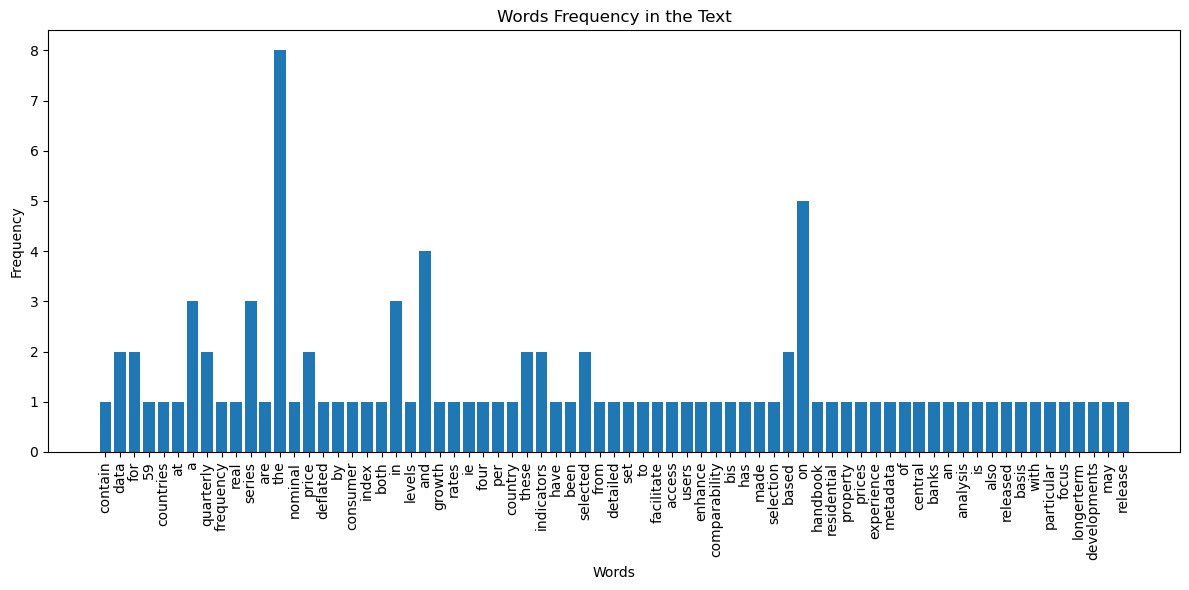

In [29]:
import matplotlib.pyplot as plt

# Data frekuensi kata
kata = list(frekuensi_kata_ina.keys())
frekuensi = list(frekuensi_kata_ina.values())

plt.figure(figsize=(12, 6))
plt.bar(kata, frekuensi)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Words Frequency in the Text')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()